In [18]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/retail_sales_dataset.csv')

1. Análisis Descriptivo y Visualización

In [19]:
# se muestran estadisticas descriptivas para comprender mejor los datos
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


1. Distribucion de variables numericas

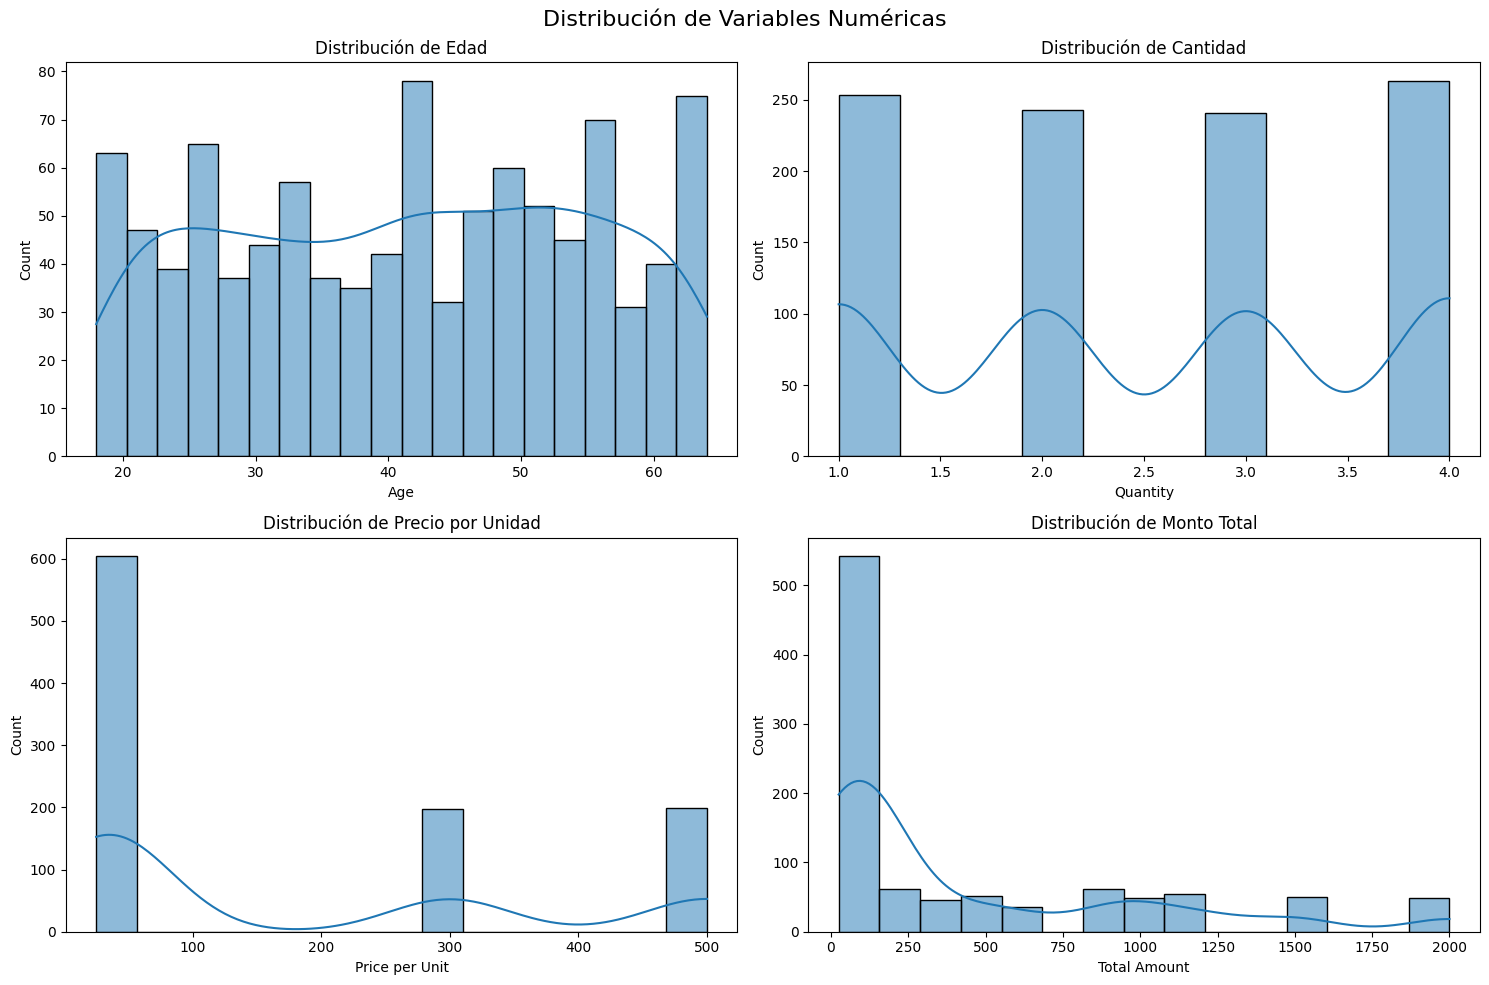

In [20]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16)

# Age
sns.histplot(data=df, x='Age', bins=20, ax=axes[0,0], kde=True)
axes[0,0].set_title('Distribución de Edad')

# Quantity
sns.histplot(data=df, x='Quantity', bins=10, ax=axes[0,1], kde=True)
axes[0,1].set_title('Distribución de Cantidad')

# Price per Unit
sns.histplot(data=df, x='Price per Unit', bins=15, ax=axes[1,0], kde=True)
axes[1,0].set_title('Distribución de Precio por Unidad')

# Total Amount
sns.histplot(data=df, x='Total Amount', bins=15, ax=axes[1,1], kde=True)
axes[1,1].set_title('Distribución de Monto Total')

plt.tight_layout()
plt.show()

* la distribucion de la edad coincide con la media que es de 41 anhos, los grupos mas grandes son menores de 20 entre 40 y 45 y finalmente mayores de 60 anhos
* la media del precio por unidad no tiene casi peso, debido a que se nota en el histograma que los productos cuyo precio unitaro es menor a 100 son mayoria, cuando la media es de 400

2. Boxplots sobre variables numericas

<Figure size 1500x600 with 0 Axes>

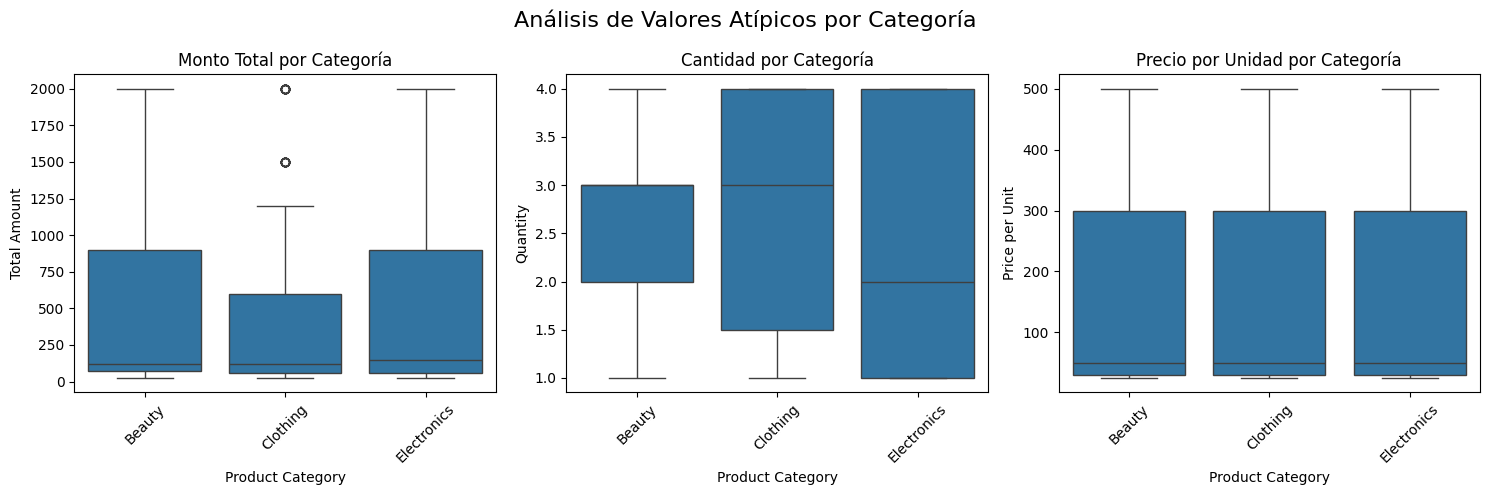

In [21]:
plt.figure(figsize=(15, 6))
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Análisis de Valores Atípicos por Categoría', fontsize=16)

sns.boxplot(data=df, x='Product Category', y='Total Amount', ax=axes[0])
axes[0].set_title('Monto Total por Categoría')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='Product Category', y='Quantity', ax=axes[1])
axes[1].set_title('Cantidad por Categoría')
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='Product Category', y='Price per Unit', ax=axes[2])
axes[2].set_title('Precio por Unidad por Categoría')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

3. Tendencia de ventas a lo largo del tiempo

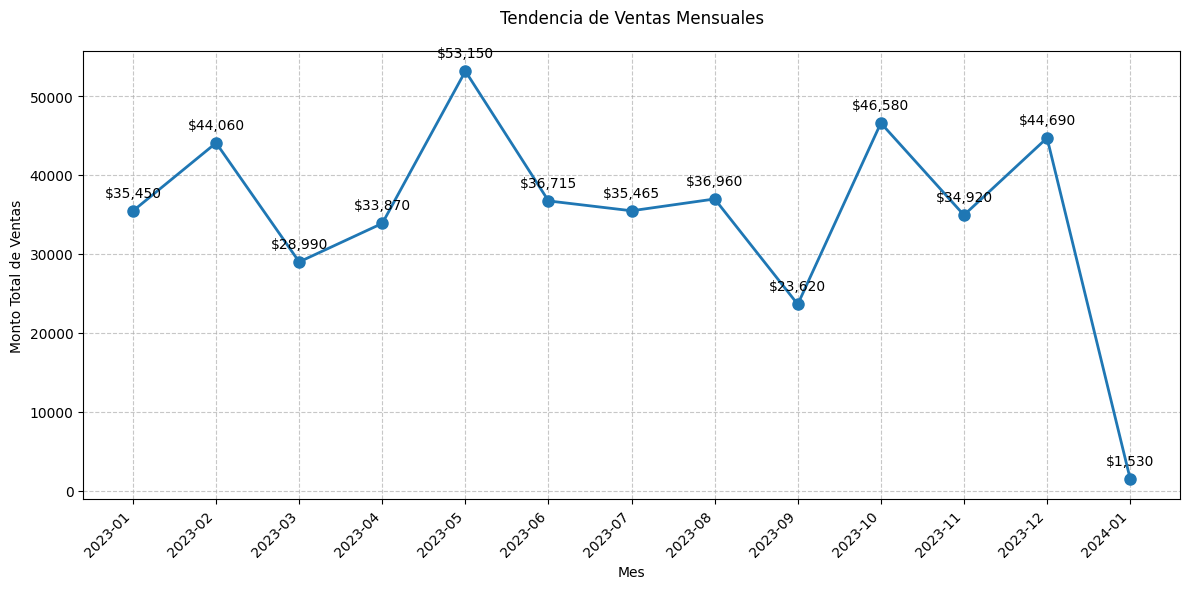

In [24]:

# Asegurar que la fecha está en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Agregar columna de año-mes para mejor agrupación
df['YearMonth'] = df['Date'].dt.strftime('%Y-%m')

# Agrupar por mes y calcular las ventas totales
ventas_mensuales = df.groupby('YearMonth')['Total Amount'].sum().reset_index()

# Crear la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de líneas
plt.plot(range(len(ventas_mensuales)), ventas_mensuales['Total Amount'], 
            marker='o', linewidth=2, markersize=8)

# Configurar el eje x
plt.xticks(range(len(ventas_mensuales)), 
            ventas_mensuales['YearMonth'],
            rotation=45,
            ha='right')

# Añadir título y etiquetas
plt.title('Tendencia de Ventas Mensuales', pad=20)
plt.xlabel('Mes')
plt.ylabel('Monto Total de Ventas')

# Añadir grid para mejor lectura
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el valor de cada punto
for i, valor in enumerate(ventas_mensuales['Total Amount']):
    plt.annotate(f'${valor:,.0f}', 
                (i, valor),
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

plt.show()

Se observa que el punto con mas tendencia en ventas fue en mayo del 2023 y el de menor ventas fue en septiembre del mismo anho

4. Graficos de dispersion

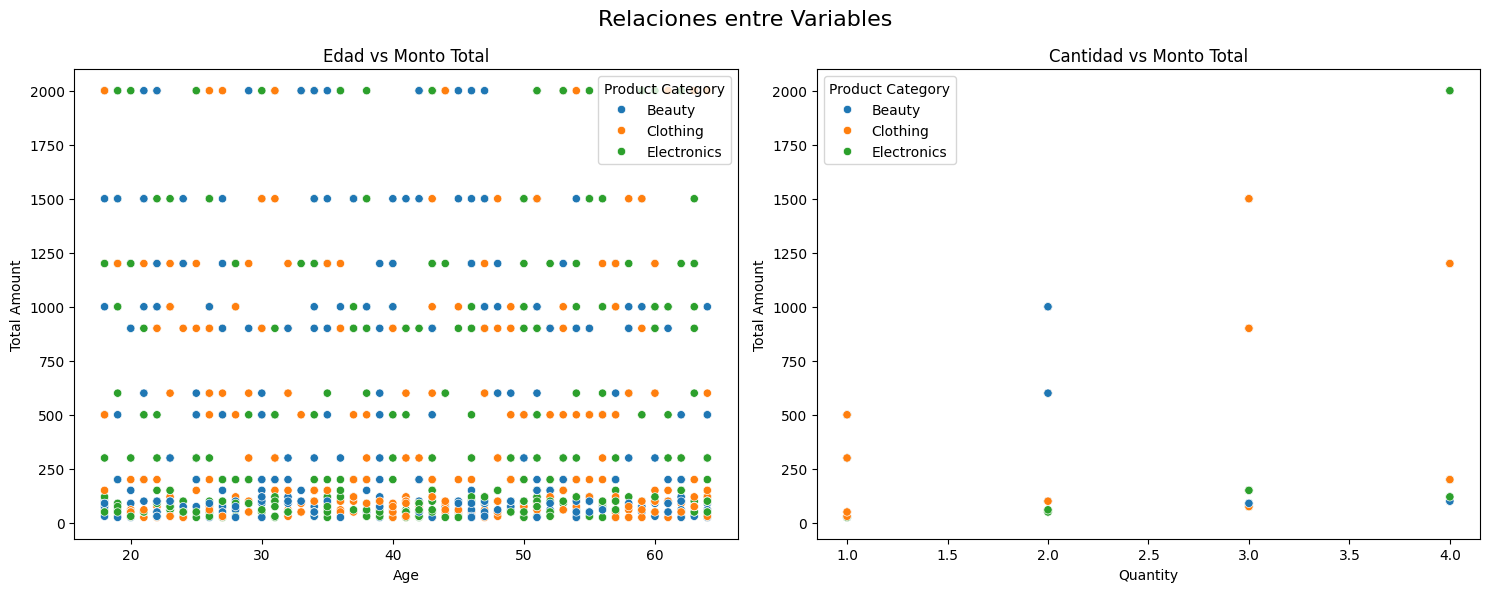

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Relaciones entre Variables', fontsize=16)

# Edad vs Monto Total
sns.scatterplot(data=df, x='Age', y='Total Amount', hue='Product Category', 
                ax=axes[0])
axes[0].set_title('Edad vs Monto Total')

# Cantidad vs Monto Total
sns.scatterplot(data=df, x='Quantity', y='Total Amount', hue='Product Category', 
                ax=axes[1])
axes[1].set_title('Cantidad vs Monto Total')

plt.tight_layout()
plt.show()

5. Distribución de las ventas

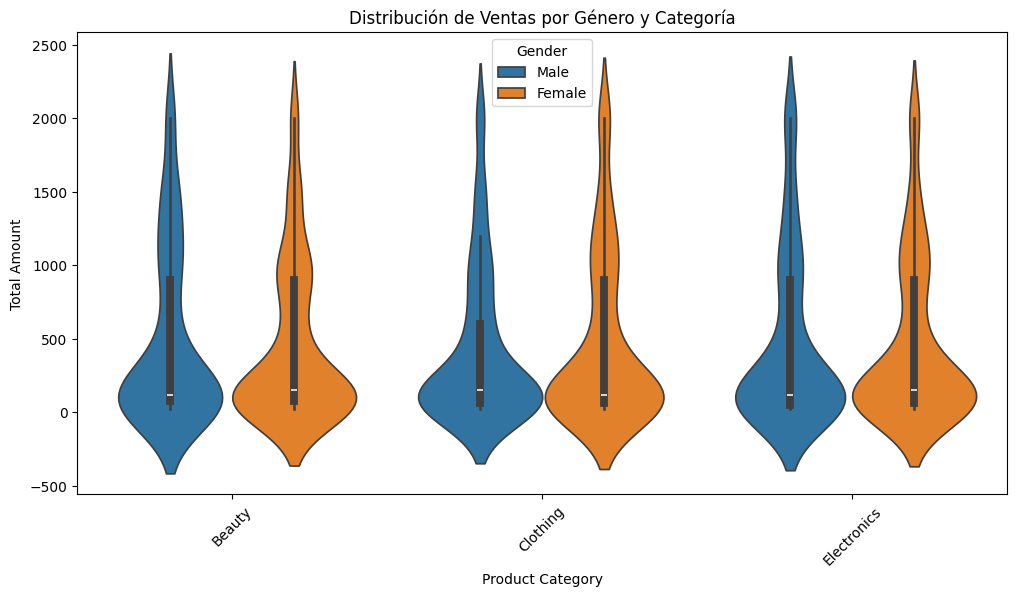

In [15]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Product Category', y='Total Amount', hue='Gender')
plt.title('Distribución de Ventas por Género y Categoría')
plt.xticks(rotation=45)
plt.show()

6. Boxplot e histogramas para buscar valores atipicos

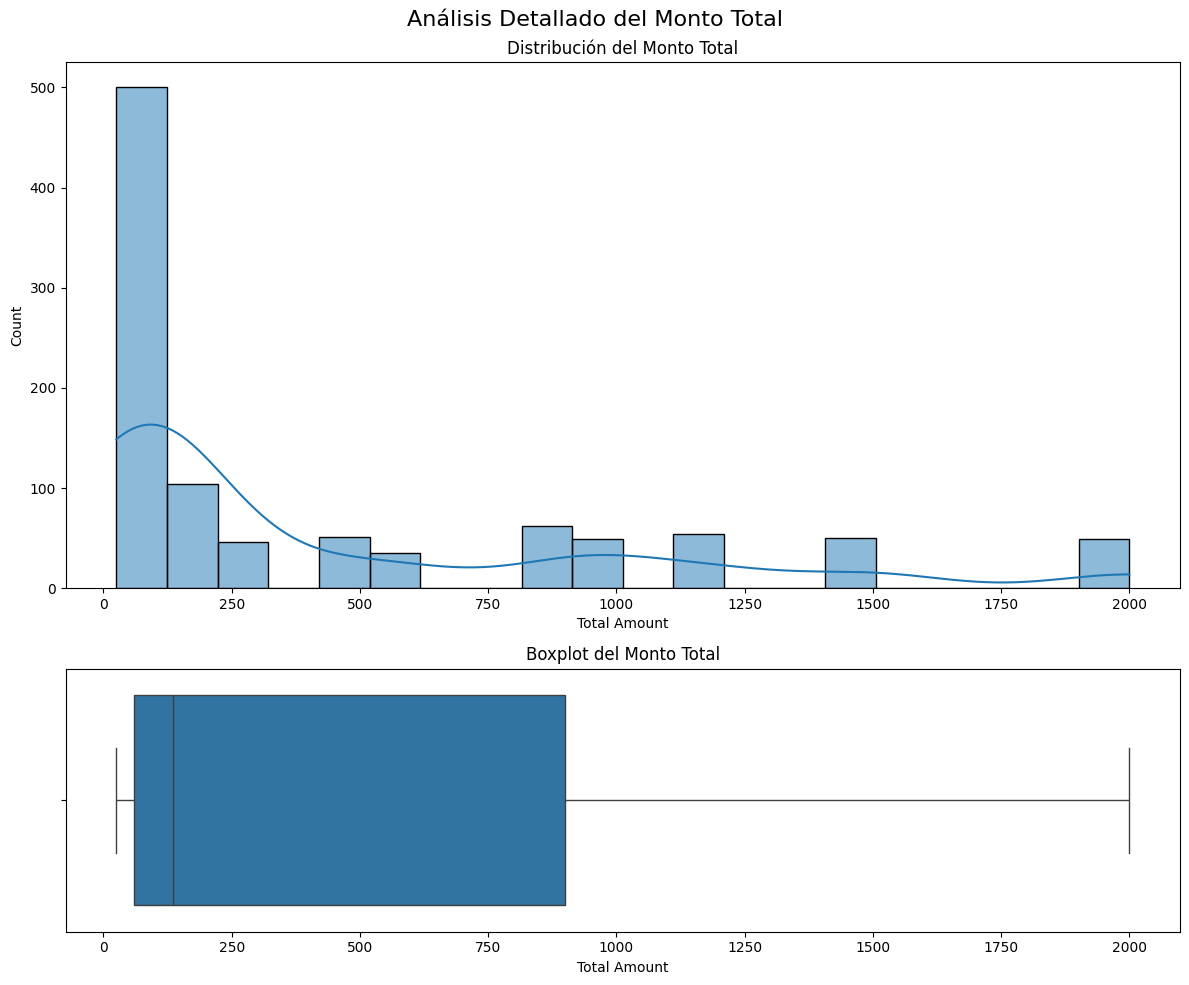

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), height_ratios=[2, 1])
fig.suptitle('Análisis Detallado del Monto Total', fontsize=16)

# Histograma
sns.histplot(data=df, x='Total Amount', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribución del Monto Total')

# Boxplot
sns.boxplot(data=df, x='Total Amount', ax=axes[1])
axes[1].set_title('Boxplot del Monto Total')

plt.tight_layout()
plt.show()

Se observa que la mayoria de las ventas se concentran entre 10 y 190 dolares de precio total siendo las menores de 100 dolares una mayoria muy grande, el histograma esta sesgado a la izquierda, por lo que la media pierde relevancia, en este caso la media del precio total era de 456 dolares